In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

vdfx = pd.read_csv("../asic/asic_catapult_matmul_area.csv", index_col=0)
cdfx = pd.read_csv("../asic/asic_catapult_matmul_latency.csv", index_col=0)
cdfx['throughput'] = cdfx['Latency'].min()*1/cdfx['Latency']
vdfx['throughput'] = cdfx['Latency'].min()*1/vdfx['Latency']
cdfx['1/Area'] = cdfx['Area'].min()*1/cdfx['Area']
vdfx['1/Area'] = cdfx['Area'].min()*1/vdfx['Area']
# drop columns and formalize
cdfx['mem_partition_size'] = cdfx['KNOB_DATA_BLOCK']
vdfx['mem_partition_size'] = vdfx['KNOB_DATA_BLOCK']
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['KNOB_MAT_SIZE'])
cdfx = cdfx.drop(columns=['KNOB_DATA_BLOCK'])
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['KNOB_MAT_SIZE'])
vdfx = vdfx.drop(columns=['KNOB_DATA_BLOCK'])

Text(0.5, 1.0, 'Matrix Multiplication Combined Design Space')

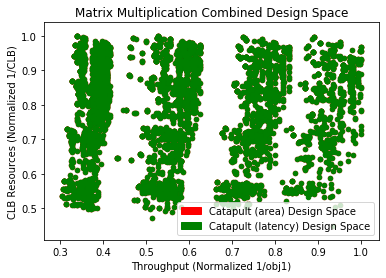

In [13]:
ax1 = vdfx.plot(x='throughput', y='1/Area', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/Area', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult (area) Design Space')
green_data = mpatches.Patch(color='green', label='Catapult (latency) Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Matrix Multiplication Combined Design Space")

Text(0, 0.5, 'CLB Resources (Normalized 1/CLB)')

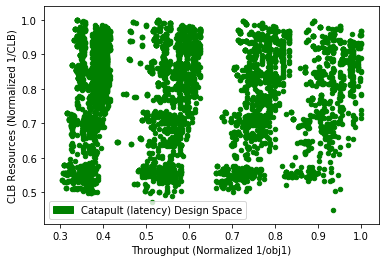

In [14]:
ax = cdfx.plot(x='throughput', y='1/Area', kind='scatter', c='g')
green_data = mpatches.Patch(color='green', label='Catapult (latency) Design Space')

plt.legend(handles=[green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title('Matrix Multiplication ASIC Latency Optimized')

Text(0.5, 1.0, 'Matrix Multiplication ASIC Area Optimized')

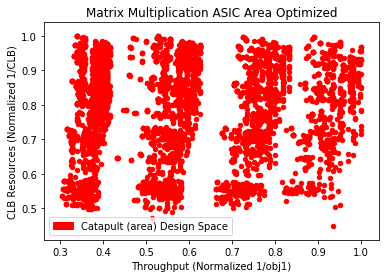

In [16]:
ax = vdfx.plot(x='throughput', y='1/Area', kind='scatter', c='r')
green_data = mpatches.Patch(color='red', label='Catapult (area) Design Space')

plt.legend(handles=[green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title('Matrix Multiplication ASIC Area Optimized')

In [17]:
print("~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~

KNOB_UNROLL_FACTOR1         3.696882
KNOB_UNROLL_FACTOR2         3.700550
KNOB_UNROLL_FACTOR3         2.829410
KNOB_SUBDIM_X               6.134363
KNOB_SUBDIM_Y               8.003057
Latency                     8.536364
Area                     3060.842076
throughput                  0.589935
1/Area                      0.794501
mem_partition_size     352178.362580
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~

KNOB_UNROLL_FACTOR1         3.694568
KNOB_UNROLL_FACTOR2         3.701607
KNOB_UNROLL_FACTOR3         2.826014
KNOB_SUBDIM_X               6.134507
KNOB_SUBDIM_Y               8.001836
Latency                     8.538837
Area                     3059.343867
throughput                  0.589751
1/Area                      0.794795
mem_partition_size     352545.571844
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [18]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['KNOB_UNROLL_FACTOR1','KNOB_UNROLL_FACTOR2','KNOB_UNROLL_FACTOR3','mem_partition_size', 'KNOB_SUBDIM_X', 'KNOB_SUBDIM_Y'], how='inner')
cv_df.count()

KNOB_UNROLL_FACTOR1    6533
KNOB_UNROLL_FACTOR2    6533
KNOB_UNROLL_FACTOR3    6533
KNOB_SUBDIM_X          6533
KNOB_SUBDIM_Y          6533
Latency_x              6533
Area_x                 6533
throughput_x           6533
1/Area_x               6533
mem_partition_size     6533
Latency_y              6533
Area_y                 6533
throughput_y           6533
1/Area_y               6533
dtype: int64

(0, 1)

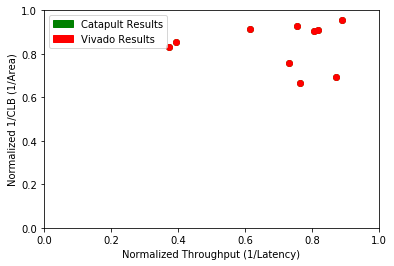

In [21]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/Area_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/Area_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/Area_x'], row['1/Area_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/Latency)')
plt.ylabel('Normalized 1/CLB (1/Area)')
plt.ylim(0, 1)
plt.xlim(0, 1)